## Финальный массив до досбора данных

In [1]:
!pip install wget

In [2]:
import pandas as pd
import wget
import requests 
from urllib.parse import urlencode
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Первичная база данных

In [4]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/EIO4Ll-8srheOA' 

# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 

# загружаем файл в df 
download_response = requests.get(download_url) 
df = pd.read_excel(download_url) 

In [28]:
df

,Column1,id,genreId,author_1_id,author_1_affiliation_id,author_1_ru last name,author_1_ru initials,author_1_ru affiliation,author_1_eng last name,author_1_eng initials,...,genre_id,cited,corecited,parent_id,source_id,isFT,isNEW,link,url,ref
0,0,15485609,4,0.0,"[['7113'], ['7113']]",Кийков,Алексей Владимирович,['Белгородский государственный технологический...,Kiykov,Aleksey Vladimirovich,...,4,3,1.0,33649315,NaN,1,0,http://elibrary.ru/item.asp?id=15485609,none,"Кийков, А.В. СОСТОЯНИЕ И ТЕНДЕНЦИИ СЕТЕВОГО ВЗ..."
1,1,15488335,4,675896.0,"['none', 'none']",Салагаев,А.,none,none,none,...,4,0,0.0,33649638,NaN,1,1,http://elibrary.ru/item.asp?id=15488335,NaN,"Салагаев, А. КУЛЬТУРНАЯ И РЕЛИГИОЗНАЯ СИТУАЦИЯ..."
2,2,15488853,4,820606.0,"[['340'], 'none']",Семченко,И.В.,['Белгородский государственный университет'],none,none,...,4,0,0.0,33649676,NaN,1,1,http://elibrary.ru/item.asp?id=15488853,NaN,"Семченко, И.В. ПРОБЛЕМЫ СОЦИАЛЬНОЙ АДАПТАЦИИ Г..."
3,3,15500786,4,77952.0,"[['210'], 'none']",Хагуров,Темыр Айтечевич,['Кубанский государственный университет'],none,none,...,4,0,0.0,33651468,NaN,1,1,http://elibrary.ru/item.asp?id=15500786,NaN,"Хагуров, Т.А. Современная культура и воспитани..."
4,4,15501422,4,746025.0,"[['2541'], 'none']",Елишев,С.О.,['МГУ им. М.В. Ломоносова?'],none,none,...,4,22,3.0,33651490,NaN,0,1,http://elibrary.ru/item.asp?id=15501422,NaN,"Елишев, С.О. Формирование ценностных ориентаци..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75227,75227,48109813,4,725411.0,"['none', ['211']]",none,none,none,Shayakhmetova,R.R.,...,4,0,0.0,48109812,17.0,1,1,http://elibrary.ru/item.asp?id=48109813,https://revista.fct.unesp.br/index.php/Nuances...,VALUES OF SELF-PRESERVING BEHAVIOR IN THE SYST...
75228,75228,47812338,4,702706.0,"['none', ['190']]",none,none,none,Kretser,I.Yu.,...,4,0,0.0,46863661,17.0,0,1,http://elibrary.ru/item.asp?id=47812338,https://polarjournal.org/2020/03/18/migration-...,"Kretser, I.Y. Domestic Economies: Women, Work,..."
75229,75229,47325063,4,1130043.0,"[['1052'], 'none']",Касаткина,М.И,['Калужский государственный университет им. К....,none,none,...,4,8,0.0,47325062,17.0,0,1,http://elibrary.ru/item.asp?id=47325063,NaN,"Касаткина, М.И. Организация работы с пожилыми ..."
75230,75230,48032031,4,910803.0,"['none', 'none']",Дыжова,Анна Анатольевна,none,none,none,...,4,0,0.0,48032030,17.0,0,1,http://elibrary.ru/item.asp?id=48032031,NaN,"Дыжова, А.А. Особенности правовой социализации..."


In [6]:
#Создаем общий список ID авторов по всем позициям в списке авторов статьи
authors = list(df['author_1_id'])
authors.append(list(df['author_2_id']))
authors.append(list(df['author_3_id']))
authors.append(list(df['author_4_id']))
authors.append(list(df['author_5_id']))
authors.append(list(df['author_6_id']))
authors.append(list(df['author_7_id']))
authors.append(list(df['author_8_id']))

In [7]:
authors1 = pd.Series(authors)
num = len(authors1.value_counts())
zeros = list(authors1.value_counts())[0]

Здесь и далее создается словарь имен (ненормализованных) с Id автора (от eLibrary)

In [39]:
auth_id = {}
for i in range(len(df)):
    name = df['author_1_ru last name'][i] + ' ' + str(df['author_1_ru initials'][i])
    if name not in auth_id.keys():
        auth_id[name] = df['author_1_id'][i]
    elif name in auth_id.keys():
        if auth_id[name] == df['author_1_id'][i]:
            pass
    
    name = df['author_2_ru last name'][i] + ' ' + str(df['author_2_ru initials'][i])
    if name not in auth_id.keys():
        auth_id[name] = df['author_2_id'][i]
    elif name in auth_id.keys():
        if auth_id[name] == df['author_2_id'][i]:
            pass
    
    name = df['author_3_ru last name'][i] + ' ' + str(df['author_3_ru initials'][i])
    if name not in auth_id.keys():
        auth_id[name] = df['author_3_id'][i]
    elif name in auth_id.keys():
        if auth_id[name] == df['author_3_id'][i]:
            pass
        
    name = df['author_4_ru last name'][i] + ' ' + str(df['author_4_ru initials'][i])
    if name not in auth_id.keys():
        auth_id[name] = df['author_4_id'][i]
    elif name in auth_id.keys():
        if auth_id[name] == df['author_4_id'][i]:
            pass
    
    name = df['author_5_ru last name'][i] + ' ' + str(df['author_5_ru initials'][i])
    if name not in auth_id.keys():
        auth_id[name] = df['author_5_id'][i]
    elif name in auth_id.keys():
        if auth_id[name] == df['author_5_id'][i]:
            pass
    
    name = df['author_6_ru last name'][i] + ' ' + str(df['author_6_ru initials'][i])
    if name not in auth_id.keys():
        auth_id[name] = df['author_6_id'][i]
    elif name in auth_id.keys():
        if auth_id[name] == df['author_6_id'][i]:
            pass
    
    name = df['author_7_ru last name'][i] + ' ' + str(df['author_7_ru initials'][i])
    if name not in auth_id.keys():
        auth_id[name] = df['author_7_id'][i]
    elif name in auth_id.keys():
        if auth_id[name] == df['author_7_id'][i]:
            pass
    
    name = df['author_8_ru last name'][i] + ' ' + str(df['author_8_ru initials'][i])
    if name not in auth_id.keys():
        auth_id[name] = df['author_8_id'][i]
    elif name in auth_id.keys():
        if auth_id[name] == df['author_8_id'][i]:
            pass

In [140]:
authors_tab = authors1.value_counts().to_frame('Counts')

In [122]:
ind = []
for i in authors_tab.index:
    ind.append(str(i))

In [141]:
authors_tab['Author ID'] = ind

In [143]:
authors_tab.reset_index(inplace=True)

In [144]:
authors_tab.drop(['index'], axis=1, inplace = True)

In [145]:
authors_tab.drop(0,0, inplace = True)

AttributeError: 'NoneType' object has no attribute 'reset_index'

In [148]:
authors_tab.reset_index(inplace = True)

In [150]:
authors_tab.drop(['level_0'], axis=1, inplace = True)

In [157]:
authors_tab['Name'] = pd.Series()

In [162]:
for i in range(len(authors_tab['Counts'][:50])):
    for name in auth_id.keys():
        if authors_tab['Author ID'][i] == str(auth_id[name]):
            authors_tab['Name'][i] = name

  0%|          | 0/50 [00:00<?, ?it/s]/Users/vasilisavashenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/vasilisavashenko/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 50/50 [00:25<00:00,  1.93it/s]


Выводим топ-50 авторов по количеству публикаций в БД

In [178]:
authors_tab[:50]

/Users/vasilisavashenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Counts,Author ID,Name
0,170,767943.0,Ростовская Тамара Керимовна
1,147,72232.0,Волков Юрий Георгиевич
2,140,129623.0,Ильин Владимир Александрович
3,130,137655.0,Зборовский Г.Е.
4,112,442046.0,Ставропольский Юлий
5,108,1382.0,Тощенко Жан Тереньтевич
6,108,331427.0,Ильиных Светлана
7,106,72610.0,Горшков М.
8,106,73979.0,Дзуцев Х. В.
9,105,74486.0,Максимова Светлана Геннадьевна


In [9]:
print('Количество уникальных авторов в датасете: {}'.format(num-1),
      'Количество авторов без ID в датасете: {}'.format(zeros),
      'Количество статей с 1 автором в датасете: {}'.format(len(df[df['author_1_id']!='none'])-len(df[df['author_2_id']!='none'])),
     'Количество статей с 2 авторами в датасете: {}'.format(len(df[df['author_2_id']!='none'])-len(df[df['author_3_id']!='none'])),
     'Количество статей с 3 авторами в датасете: {}'.format(len(df[df['author_3_id']!='none'])-len(df[df['author_4_id']!='none'])),
     'Количество статей с 4 авторами в датасете: {}'.format(len(df[df['author_4_id']!='none'])-len(df[df['author_5_id']!='none'])),
     'Количество статей с 5 авторами в датасете: {}'.format(len(df[df['author_5_id']!='none'])-len(df[df['author_6_id']!='none'])),
     'Количество статей с 6 авторами в датасете: {}'.format(len(df[df['author_6_id']!='none'])-len(df[df['author_7_id']!='none'])),
     'Количество статей с 7 авторами в датасете: {}'.format(len(df[df['author_7_id']!='none'])-len(df[df['author_8_id']!='none'])),
     'Количество статей с 8 авторами в датасете: {}'.format(len(df[df['author_8_id']!='none'])), 
      'Количество уникальных журналов в датасете: {}'.format(len(set(df['journal_id']))),
      'Количество уникальных издательств в датасете: {}'.format(len(set(df['publisher']))),
      'Количество статей с указанием финансирования: {}'.format(len(df[df['support']!='none'])),
      'Количество абстрактов на русском языке: {} из {}'.format(len(df[df['abstract_ru']!='none']),len(df['abstract_ru'])),
      'Количество абстрактов на английском языке: {} из {}'.format(len(df[df['abstract_eng']!='none']),len(df['abstract_ru'])),
      sep = '\n')

Количество уникальных авторов в датасете: 15129
Количество авторов без ID в датасете: 14228
Количество статей с 1 автором в датасете: 49974
Количество статей с 2 авторами в датасете: 18469
Количество статей с 3 авторами в датасете: 5044
Количество статей с 4 авторами в датасете: 1145
Количество статей с 5 авторами в датасете: 362
Количество статей с 6 авторами в датасете: 109
Количество статей с 7 авторами в датасете: 64
Количество статей с 8 авторами в датасете: 65
Количество уникальных журналов в датасете: 3910
Количество уникальных издательств в датасете: 1761
Количество статей с указанием финансирования: 1785
Количество абстрактов на русском языке: 47493 из 75232
Количество абстрактов на английском языке: 47481 из 75232


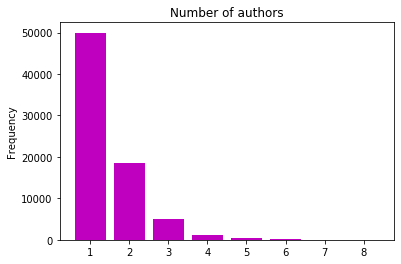

In [197]:
#Распределение статей по количеству авторов
fig, ax = plt.subplots()
bar_abstr_eng = ax.bar(range(1,9),
                       [49974,18469,5044,1145,362,109,64,65],  
                       color='m')

ax.set_ylabel('Frequency')
ax.set_title('Number of authors')
plt.show()

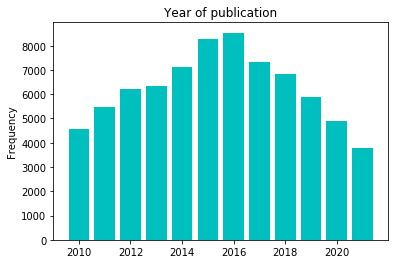

In [192]:
#Распределение статей по году публикации
fig, ax = plt.subplots()
bar_abstr_eng = ax.bar(df['year'].value_counts().keys(),
                       df['year'].value_counts().values,  
                       color='c')

ax.set_ylabel('Frequency')
ax.set_title('Year of publication')
plt.show()

In [189]:
words_eng = []
for i in df[df['keywords_eng']!='none']['keywords_eng']:
    listik = []
    for l in i.split(','):
        listik.append(l.strip(" '").lstrip("['").rstrip("'").rstrip("']"))
    words_eng.append(listik)

In [193]:
dict_eng = {}
for i in words_eng:
    for m in i:
        if m in dict_eng.keys():
            dict_w[m] +=1
        else: 
            dict_w[m] = 1

In [198]:
#Отсортированный словарь ключевых слов на английском языке
sorted(dict_eng.items(), key=lambda x: x[1], reverse = True)

[('youth', 2848),
 ('society', 1342),
 ('family', 1269),
 ('values', 1224),
 ('culture', 1034),
 ('education', 990),
 ('globalization', 875),
 ('students', 855),
 ('migration', 839),
 ('socialization', 820),
 ('identity', 790),
 ('civil society', 716),
 ('modernization', 695),
 ('communication', 631),
 ('state', 611),
 ('management', 601),
 ('russia', 580),
 ('region', 579),
 ('internet', 571),
 ('sociology', 534),
 ('social networks', 479),
 ('adaptation', 468),
 ('social policy', 465),
 ('employment', 454),
 ('public opinion', 447),
 ('religion', 437),
 ('patriotism', 434),
 ('gender', 432),
 ('social work', 430),
 ('mass media', 429),
 ('social capital', 426),
 ('trust', 424),
 ('integration', 423),
 ('social well-being', 423),
 ('social structure', 423),
 ('personality', 418),
 ('sociological research', 417),
 ('social adaptation', 417),
 ('health', 409),
 ('tolerance', 407),
 ('conflict', 406),
 ('information society', 392),
 ('information', 381),
 ('labor market', 377),
 ('higher

In [203]:
words_rus = []
for i in df[df['keywords_ru']!='none']['keywords_ru']:
    listik = []
    for l in i.split(','):
        listik.append(l.strip(" '").lstrip("['").rstrip("'").rstrip("']"))
    words_rus.append(listik)

In [208]:
dict_ru = {}
for i in words_rus:
    for m in i:
        if m != '':
            if m in dict_ru.keys():
                dict_ru[m] +=1
            else: 
                dict_ru[m] = 1

In [209]:
#Отсортированный словарь ключевых слов на русском языке
sorted(dict_ru.items(), key=lambda x: x[1], reverse = True)

[('молодежь', 3730),
 ('семья', 1751),
 ('общество', 1600),
 ('ценности', 1534),
 ('культура', 1329),
 ('образование', 1127),
 ('глобализация', 1125),
 ('социализация', 1122),
 ('миграция', 994),
 ('гражданское общество', 931),
 ('идентичность', 931),
 ('модернизация', 917),
 ('государство', 881),
 ('управление', 771),
 ('социология', 745),
 ('социальные сети', 735),
 ('интернет', 730),
 ('россия', 701),
 ('коммуникация', 697),
 ('рынок труда', 690),
 ('личность', 685),
 ('регион', 682),
 ('ценностные ориентации', 671),
 ('социальная политика', 670),
 ('студенты', 626),
 ('адаптация', 604),
 ('социальное самочувствие', 594),
 ('конфликт', 591),
 ('власть', 583),
 ('интеграция', 567),
 ('общественное мнение', 562),
 ('патриотизм', 561),
 ('социальная работа', 549),
 ('социологическое исследование', 549),
 ('доверие', 542),
 ('религия', 536),
 ('качество жизни', 532),
 ('толерантность', 525),
 ('гендер', 524),
 ('социальный институт', 522),
 ('социальный капитал', 522),
 ('социальная стр

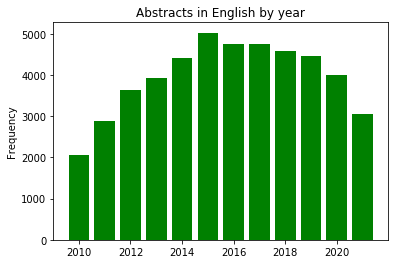

In [242]:
#Распределение количества абстрактов на английском по годам
fig, ax = plt.subplots()
bar_abstr_eng = ax.bar(df[df['abstract_eng']!='none']['year'].value_counts().keys(),
                       df[df['abstract_eng']!='none']['year'].value_counts().values,  
                       color='g')

ax.set_ylabel('Frequency')
ax.set_title('Abstracts in English by year')
plt.show()

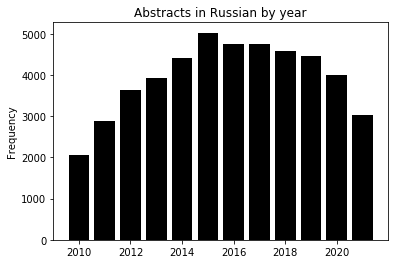

In [189]:
#Распределение количества абстрактов на русском по годам
fig, ax = plt.subplots()
bar_abstr_eng = ax.bar(df[df['abstract_ru']!='none']['year'].value_counts().keys(),
                       df[df['abstract_ru']!='none']['year'].value_counts().values,  
                       color='k')

ax.set_ylabel('Frequency')
ax.set_title('Abstracts in Russian by year')
plt.show()

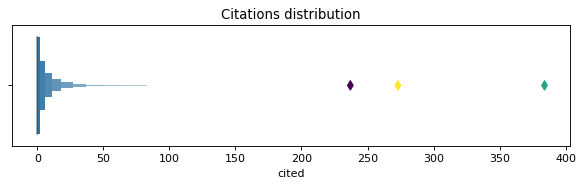

In [237]:
#Распределение количества цитат
plt.figure(figsize=(9,2), dpi= 80)
sns.boxenplot(x=df["cited"], 
              k_depth = 'trustworthy')
plt.title('Citations distribution', fontsize=12)
plt.show()

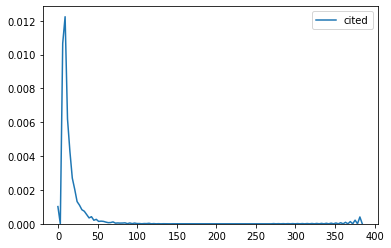

In [241]:
#другая визуализация количества цитат
sns.kdeplot(data = df['cited'])

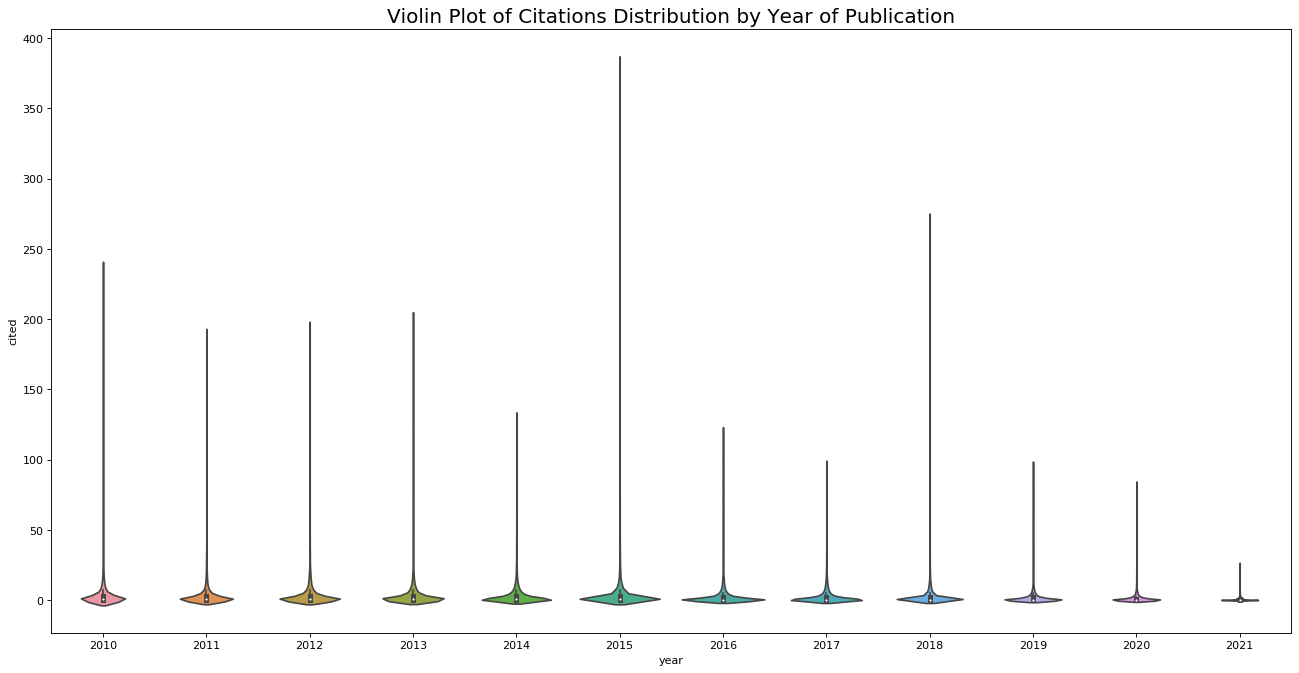

In [210]:
#Распределение количества цитат по годам
plt.figure(figsize=(20,10), dpi= 80)
sns.violinplot(x='year', y='cited', data=df, scale='count')
plt.title('Violin Plot of Citations Distribution by Year of Publication', fontsize=18)
plt.show()